In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データの確認

In [2]:
data = pd.read_csv("/home/haruk/workspace/ml-workspace-202507/kaggle/lunch_signate/data/train.csv")
data.sample(20)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
54,2014-2-14,86,金,1,ロース甘味噌焼き,432.0,NaN,NaN,NaN,雪,0.5,1.2
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1
21,2013-12-17,145,火,0,手作りヒレカツ,NaN,NaN,ママの会,NaN,曇,--,10.8
139,2014-6-19,56,木,0,アジ唐揚げ南蛮ソース,430.0,NaN,NaN,NaN,晴れ,--,27.5
184,2014-8-27,62,水,0,カレイの唐揚げ,410.0,NaN,NaN,NaN,曇,0,21.0
156,2014-7-14,65,月,1,鶏のから揚げねぎ塩炒めソース,418.0,NaN,NaN,NaN,薄曇,0,30.9
187,2014-9-1,65,月,1,ビーフシチュー,380.0,NaN,NaN,NaN,曇,--,23.4
22,2013-12-18,145,水,1,回鍋肉,NaN,NaN,NaN,NaN,曇,--,7.8
106,2014-5-1,64,木,0,マーボ茄子,415.0,NaN,NaN,NaN,晴れ,--,24.0
149,2014-7-3,53,木,0,白身魚ムニエル,412.0,NaN,NaN,NaN,薄曇,--,27.0


In [3]:
#データ数の確認
data.shape

(207, 12)

In [4]:
#カラムの確認
data.columns

Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')

In [5]:
#データ型の確認
data.dtypes

datetime          object
y                  int64
week              object
soldout            int64
name              object
kcal             float64
remarks           object
event             object
payday           float64
weather           object
precipitation     object
temperature      float64
dtype: object

In [6]:
#欠損値の確認
data.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [7]:
data[~data["payday"].isnull()]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
16,2013-12-10,155,火,0,やわらかロースのサムジョン,NaN,NaN,NaN,1.0,曇,0.5,7.1
31,2014-1-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,--,5.1
51,2014-2-10,137,月,0,鶏の唐揚げおろしソース,423.0,NaN,NaN,1.0,曇,--,7.8
70,2014-3-10,123,月,0,海老クリーミ―クノーデル,385.0,NaN,NaN,1.0,曇,--,7.6
92,2014-4-10,87,木,0,鶏の唐揚げおろしソース,362.0,NaN,NaN,1.0,晴れ,--,21.3
110,2014-5-9,58,金,1,手作りチキンカツ,434.0,NaN,NaN,1.0,晴れ,--,23.4
132,2014-6-10,56,火,0,カレイ唐揚げ野菜餡かけ,426.0,NaN,NaN,1.0,曇,--,25.5
154,2014-7-10,48,木,0,プルコギ,386.0,NaN,NaN,1.0,曇,--,28.8
174,2014-8-8,129,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,1.0,曇,--,31.1
194,2014-9-10,54,水,0,ぶりレモンペッパー焼き,450.0,NaN,NaN,1.0,曇,0,25.0


In [8]:
data["payday"].value_counts()

payday
1.0    10
Name: count, dtype: int64

In [9]:
data["precipitation"].value_counts()

precipitation
--     169
0       23
0.5      9
1.5      2
1        1
6        1
6.5      1
2.5      1
Name: count, dtype: int64

In [10]:
#説明変数の分類
numbers = ["kcal","temparature","precipitation"]
categories_object = ["week","name","remarks","event","weather"]
categories_number = ["soldout","payday"]

# 各説明変数の中身を見ていく

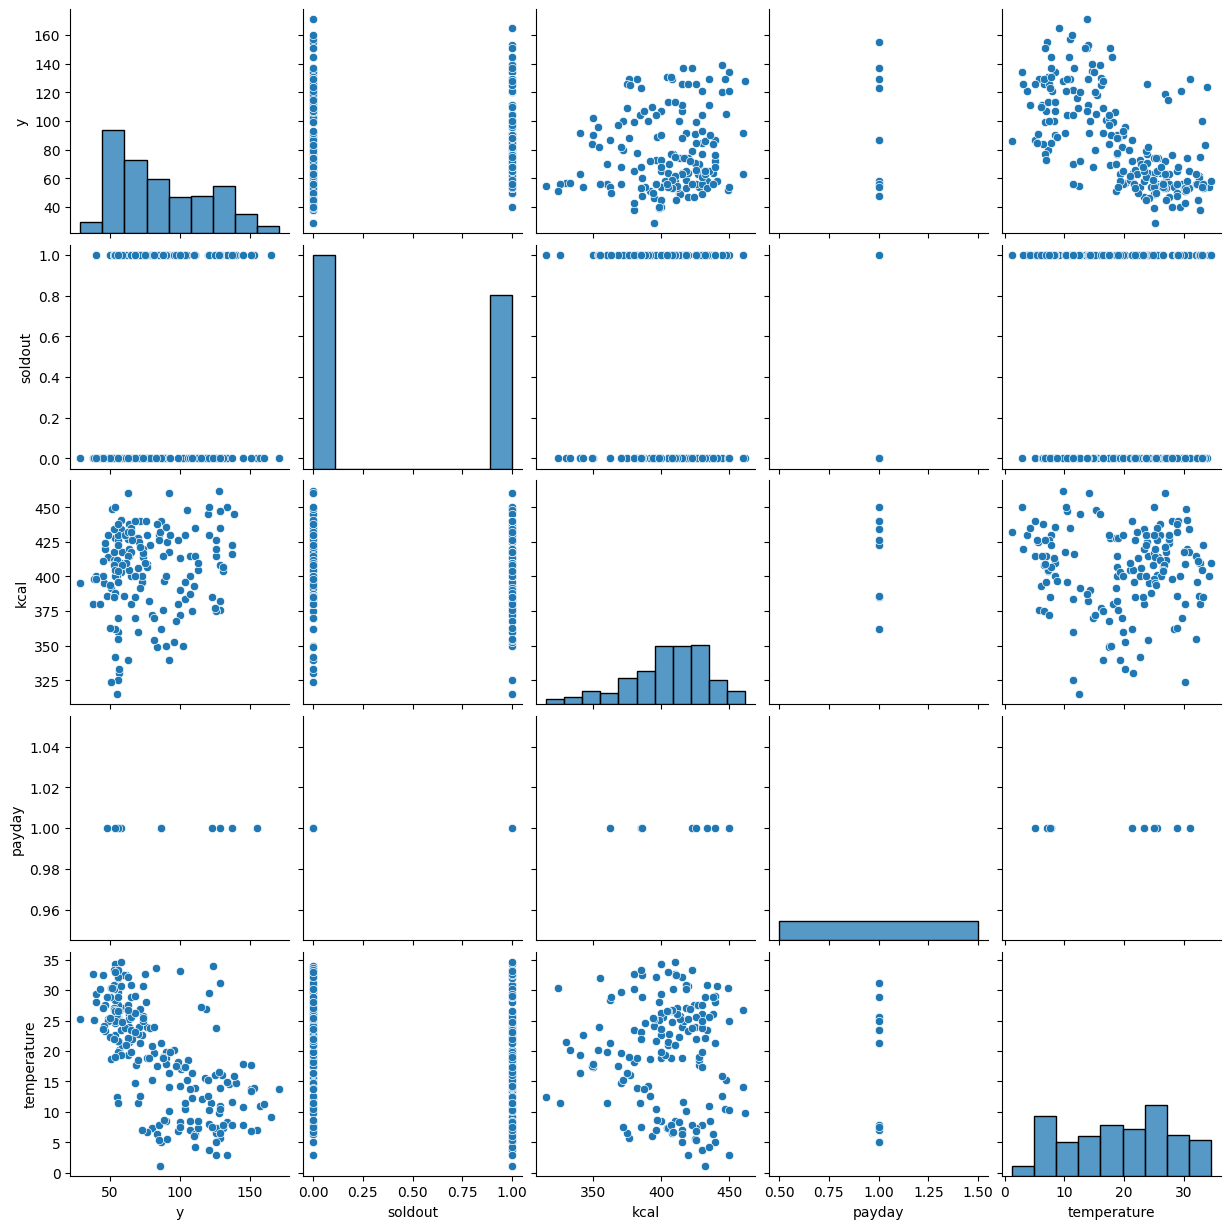

In [11]:
sns.pairplot(data=data.select_dtypes(include=[np.number]))
# yと気温には負の相関が、yとkclには弱い正の相関がありそうだ

### 曜日と売り上げの関係

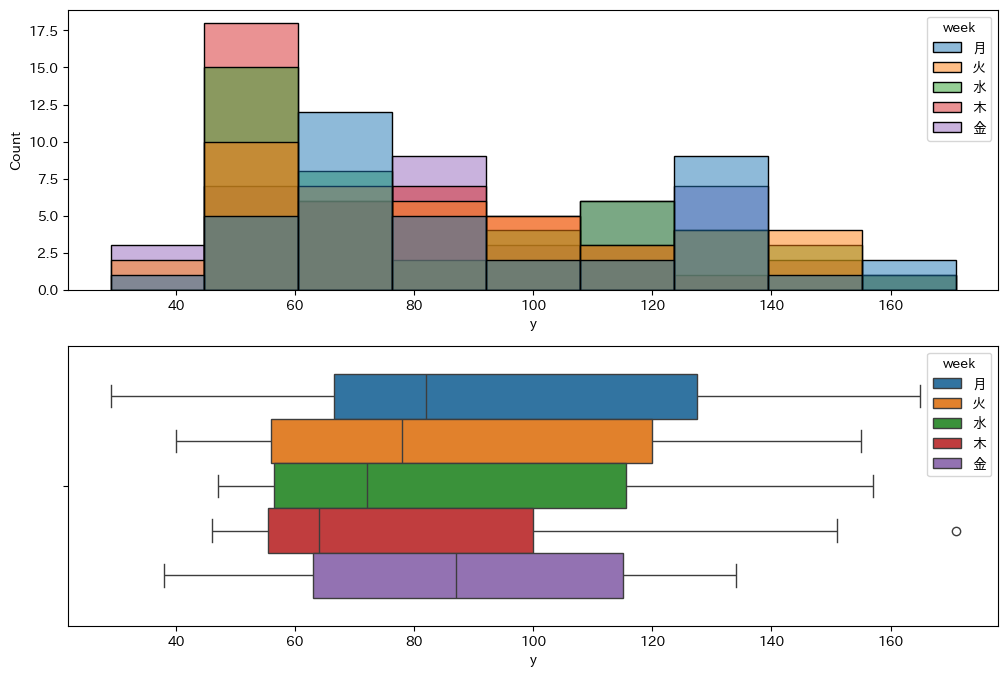

In [ ]:
flg,ax = plt.subplots(2,1,figsize=(12,8))
sns.boxplot(data=data,x="y",hue="week",ax=ax[0])
sns.histplot(data=data,x="y",hue="week",ax=ax[1])
plt.show()

- 金曜日の中央値が大きい
- 木曜日の売り上げが少なめ
- 相関は弱い正の相関か

### soldoutとyの関係

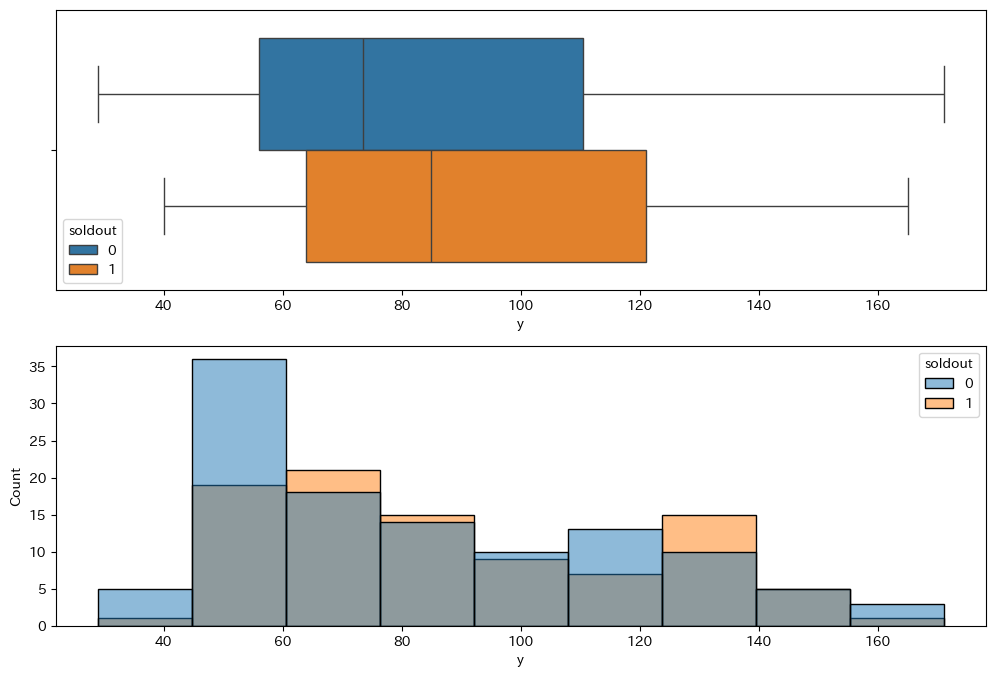

In [17]:
flg,ax = plt.subplots(2,1,figsize=(12,8))
sns.boxplot(data=data,x="y",hue="soldout",ax=ax[0])
sns.histplot(data=data,x="y",hue="soldout",ax=ax[1])
plt.show()

### 弁当の種類と売り上げ

In [21]:
data["name"].nunique()

156

In [ ]:
#重複している弁当の数と売上個数平均値
data[data["name"].duplicated(keep=False)].groupby("name")["y"].agg(["count","sum","mean"])

,count,sum,mean
name,,,
カレイ唐揚げ野菜あんかけ,2,164,82.000000
キーマカレー,3,295,98.333333
タンドリーチキン,6,430,71.666667
チキンカレー,3,376,125.333333
チンジャオロース,3,316,105.333333
ハンバーグカレーソース,2,270,135.000000
ハンバーグデミソース,2,228,114.000000
ボローニャ風カツ,2,213,106.500000
ポークカレー,3,365,121.666667


- 弁当の種類で売り上げが変わっているかは判断できない

In [43]:
data.columns

Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')

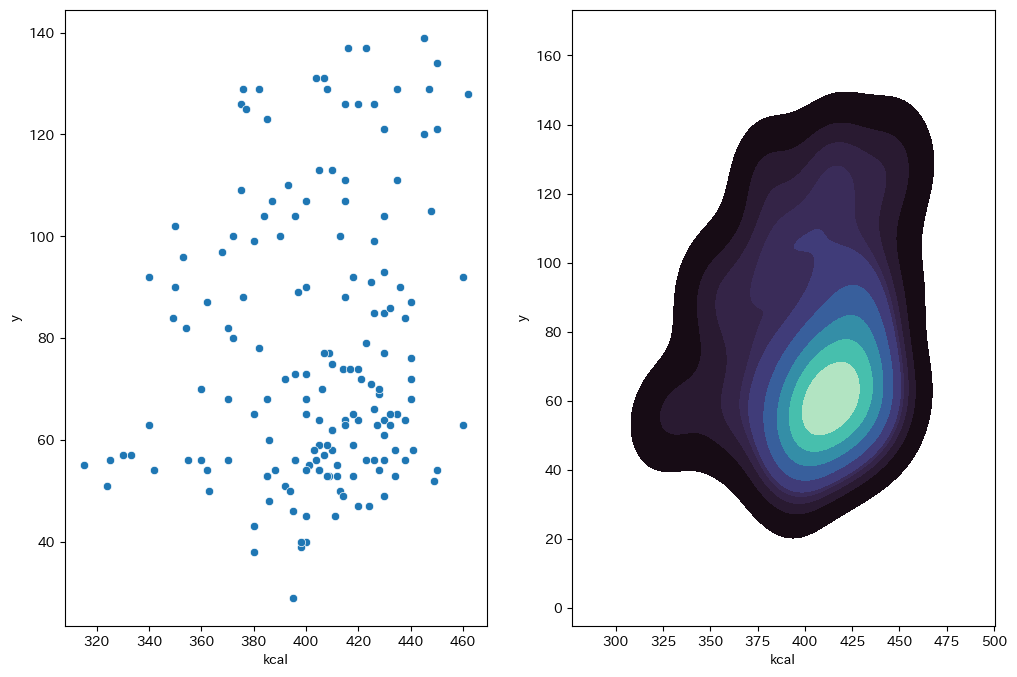

In [48]:
flg,ax = plt.subplots(1,2,figsize=(12,8))
sns.scatterplot(data=data,x="kcal",y="y",ax=ax[0])
sns.kdeplot(data=data, x="kcal", y="y", fill=True, cmap="mako",ax=ax[1])
plt.show()


In [49]:
data[["y","kcal"]].corr()

,y,kcal
y,1.000000,0.147269
kcal,0.147269,1.000000
